In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
triangle1 = "/content/drive/MyDrive/Colab Notebooks/VISIONS & PERSPECTIVE/11esercizio/tr1.jpg"
triangle2 = "/content/drive/MyDrive/Colab Notebooks/VISIONS & PERSPECTIVE/11esercizio/tr2.jpg"
triangle3 = "/content/drive/MyDrive/Colab Notebooks/VISIONS & PERSPECTIVE/11esercizio/tr3.jpg"

landscape = "/content/drive/MyDrive/Colab Notebooks/VISIONS & PERSPECTIVE/11esercizio/landscape.png"
car = "/content/drive/MyDrive/Colab Notebooks/VISIONS & PERSPECTIVE/11esercizio/auto.jfif"
groups = "/content/drive/MyDrive/Colab Notebooks/VISIONS & PERSPECTIVE/11esercizio/gruppi.jpg"
cars = "/content/drive/MyDrive/Colab Notebooks/VISIONS & PERSPECTIVE/11esercizio/4cars.jpg"

In [ ]:
def doKmeans(img, k):
    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # reshape the image to a 2D array of pixels and 3 color values (RGB), and then to float
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    stop_criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

    ret, label, center = cv2.kmeans(pixel_values, k, None, stop_criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # convert back to 8 bit values, flat
    center = np.uint8(center)
    label = label.flatten()

    # convert all pixels to the color of the centroids and reshape to the original size
    segmented_image = center[label.flatten()]
    segmented_image = segmented_image.reshape(image.shape)

    return segmented_image

(<matplotlib.axes._subplots.AxesSubplot at 0x7f54f05ac610>,
 Text(0.5, 1.0, 'Clusterized'))

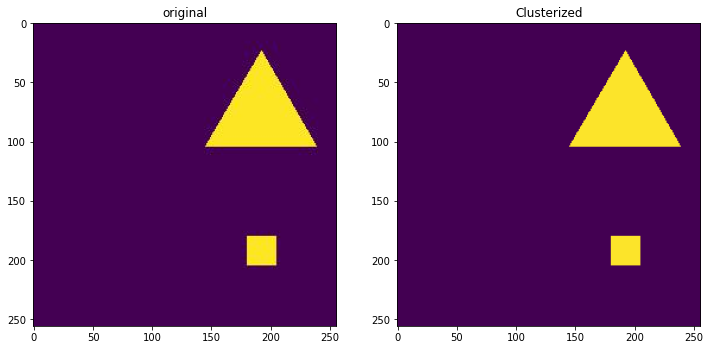

In [ ]:
img = cv2.imread(triangle1)
seg_tr_1 = doKmeans(img, 2)

imgOk = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(25,25))
plt.subplot(141), plt.imshow(imgOk), plt.title("original")
plt.subplot(142), plt.imshow(seg_tr_1), plt.title("Clusterized")

(<matplotlib.axes._subplots.AxesSubplot at 0x7f54f1a3d1d0>,
 Text(0.5, 1.0, 'Clusterized'))

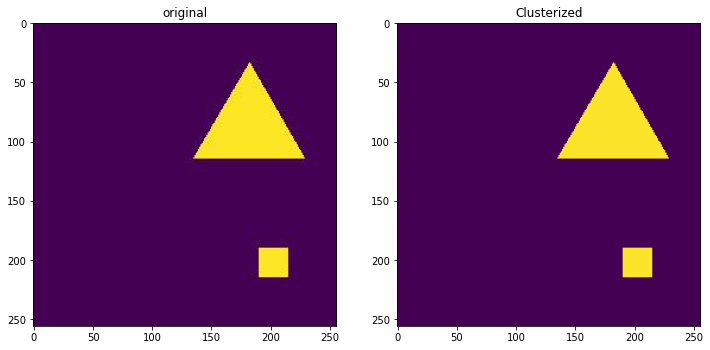

In [ ]:
img = cv2.imread(triangle2)
seg_tr_2 = doKmeans(img, 2)

imgOk = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(25,25))
plt.subplot(141), plt.imshow(imgOk), plt.title("original")
plt.subplot(142), plt.imshow(seg_tr_2), plt.title("Clusterized")

(<matplotlib.axes._subplots.AxesSubplot at 0x7f54f1855190>,
 Text(0.5, 1.0, 'Clusterized'))

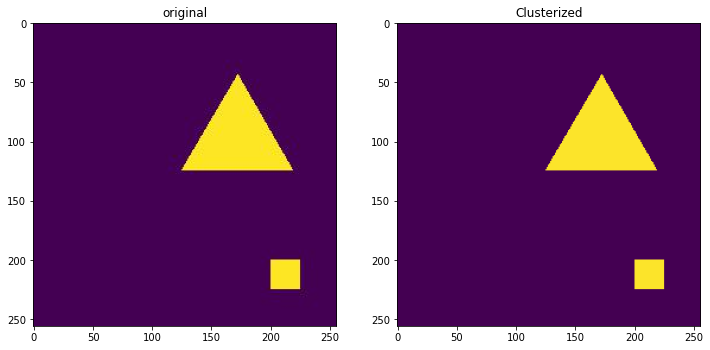

In [ ]:
img = cv2.imread(triangle3)
seg_tr_3 = doKmeans(img, 2)

imgOk = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(25,25))
plt.subplot(141), plt.imshow(imgOk), plt.title("original")
plt.subplot(142), plt.imshow(seg_tr_3), plt.title("Clusterized")

###OPTICAL FLOW###

###Lucas-Kenade method###

2


(<matplotlib.axes._subplots.AxesSubplot at 0x7f54f02cdc90>,
 <matplotlib.image.AxesImage at 0x7f54f02bd8d0>)

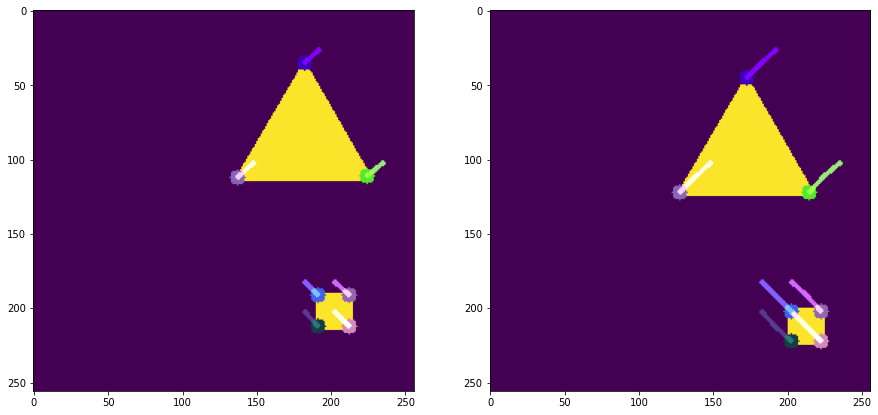

In [ ]:
#Shi-Tomasi algorithm

def lucaskenade(seg_tr_1, frames, final):
    # params for corner detection
    feature_params = dict( maxCorners = 100,
                          qualityLevel = 0.3,
                          minDistance = 7,
                          blockSize = 7 )
  
    # Parameters for lucas kanade optical flow
    lk_params = dict( winSize = (15, 15),
                      maxLevel = 2,
                      criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
  
    # Create some random colors
    color = np.random.randint(0, 255, (100, 3))
  
    # Take first frame and find corners in it
    #ret, old_frame = cap.read()
    prev = seg_tr_1
    prev_gray = cv2.cvtColor(prev, cv2.COLOR_BGR2GRAY)
    p0 = cv2.goodFeaturesToTrack(prev_gray, mask = None, **feature_params)
  
    # Create a mask image for drawing purposes
    mask = np.zeros_like(prev)
  
    for i in frames:
          next = i
          next_gray = cv2.cvtColor(next, cv2.COLOR_BGR2GRAY)
          # calculate optical flow
          p1, st, err = cv2.calcOpticalFlowPyrLK(prev_gray,
                                                next_gray,
                                                p0, None,
                                                **lk_params)
          # Select good points
          good_new = p1[st == 1]
          good_old = p0[st == 1]
  
          # draw the tracks
          for i, (new, old) in enumerate(zip(good_new, good_old)):
              a, b = new.ravel()
              c, d = old.ravel()
              mask = cv2.line(mask, (a, b), (c, d), color[i].tolist(), 2)
          
              next = cv2.circle(next, (a, b), 5, color[i].tolist(), -1)
          
          img = cv2.add(next, mask)
  
          #cv2_imshow(img)
          #plt.imshow(img)
          final.append(img)
          #print("\n")
  
          # Updating Previous frame and points 
          prev_gray = next_gray.copy()
          p0 = good_new.reshape(-1, 1, 2)
  


frames = [seg_tr_2, seg_tr_3]
final = []
lucaskenade(seg_tr_1, frames, final)

print(len(final))

plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(final[0])
plt.subplot(122), plt.imshow(final[1])

###Optical Dense###

step 1
step2


(<matplotlib.axes._subplots.AxesSubplot at 0x7f54f0370410>,
 <matplotlib.image.AxesImage at 0x7f54f018df50>)

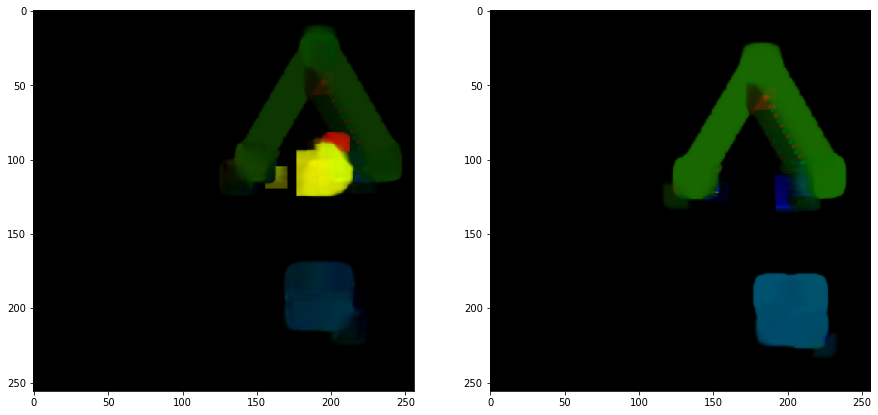

In [ ]:
#based on Farnersback's algorithm

# Here I don't have a video to analyse trhough optical flow
# => here I use triangle1, triangle2 and triangle3 segmented as frames

def fne(prev_gray, next_gray, mask):
    flow = cv2.calcOpticalFlowFarneback(prev_gray,next_gray, None, 0.5, 3, 15, 3, 5, 1.2, 0) #0.5, 3, 10, 3, 2, 2, 0)
    magnitude, angle = cv2.cartToPolar(flow[...,0], flow[...,1])
    mask[...,0] = angle*180 / np.pi / 2
    mask[...,2] = cv2.normalize(magnitude,None,0,255,cv2.NORM_MINMAX)
    rgb = cv2.cvtColor(mask,cv2.COLOR_HSV2BGR)
    return rgb

tr1gray = cv2.cvtColor(seg_tr_1,cv2.COLOR_BGR2GRAY)
tr2gray = cv2.cvtColor(seg_tr_2,cv2.COLOR_BGR2GRAY)
tr3gray = cv2.cvtColor(seg_tr_3,cv2.COLOR_BGR2GRAY)

final = []

prev= seg_tr_1
prev_gray = tr1gray
mask = np.zeros_like(seg_tr_1)
mask[...,1] = 255

#while
next = seg_tr_2
next_gray = tr2gray
rgbb= fne(prev_gray, next_gray, mask)
print("step 1")
final.append(rgbb)
#cv2_imshow(rgbb)
#print("\n")

prev1_gray = tr2gray
next1_gray = tr3gray
rgbb1= fne(prev1_gray, next1_gray, mask)
print("step2")
final.append(rgbb1)
#cv2_imshow(rgbb1)


plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(final[0])
plt.subplot(122), plt.imshow(final[1])

###Other examples of clusterization through kmeans###

(<matplotlib.axes._subplots.AxesSubplot at 0x7f54f03701d0>,
 Text(0.5, 1.0, 'Clusterized'))

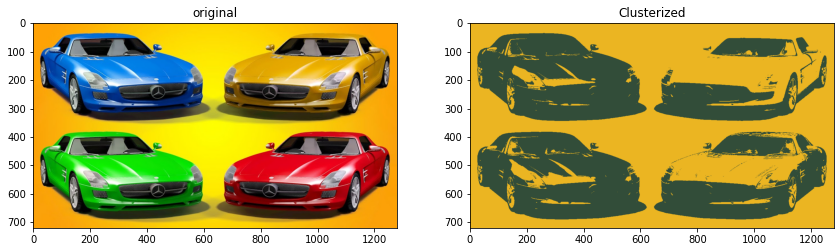

In [ ]:
#if we wanted an algorithm to segment wrt the shape, K-means can't do that. In fact here we see that the 4 cars 
#have the same shapes, but there is no way through K-means to gather the 4 cars only in one cluster.

img = cv2.imread(cars)
ok = doKmeans(img, 2) # because of the shadows, we need at least 7 clusters in order to have 5 different colors for the groups
                      # but, in order to only segment the figures, k=2 is enough

# show the image
imgOk = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(30,30))
plt.subplot(141), plt.imshow(imgOk), plt.title("original")
plt.subplot(142), plt.imshow(ok), plt.title("Clusterized")

(<matplotlib.axes._subplots.AxesSubplot at 0x7f54effbafd0>,
 Text(0.5, 1.0, 'Clusterized'))

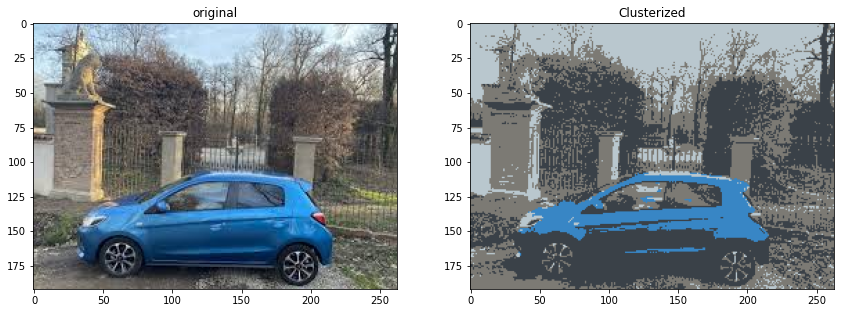

In [ ]:
img = cv2.imread(car)
ok = doKmeans(img, 4)

# show the image
imgOk = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(30,30))
plt.subplot(141), plt.imshow(imgOk), plt.title("original")
plt.subplot(142), plt.imshow(ok), plt.title("Clusterized")

(<matplotlib.axes._subplots.AxesSubplot at 0x7f54eff7c990>,
 Text(0.5, 1.0, 'Clusterized'))

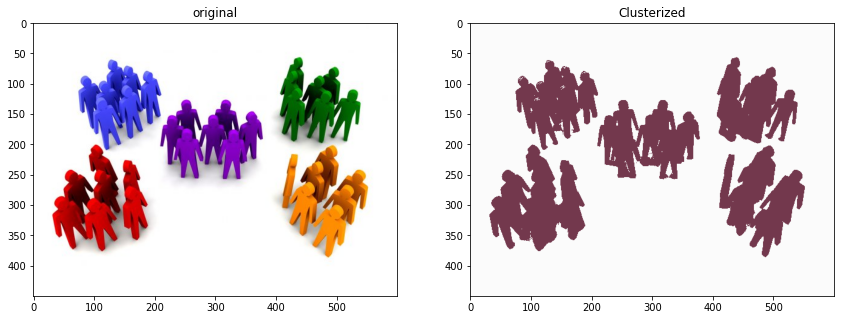

In [ ]:
img = cv2.imread(groups)
ok = doKmeans(img, 2)

# show the image
imgOk = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(30,30))
plt.subplot(141), plt.imshow(imgOk), plt.title("original")
plt.subplot(142), plt.imshow(ok), plt.title("Clusterized")

(<matplotlib.axes._subplots.AxesSubplot at 0x7f54efe4df10>,
 Text(0.5, 1.0, 'Clusterized'))

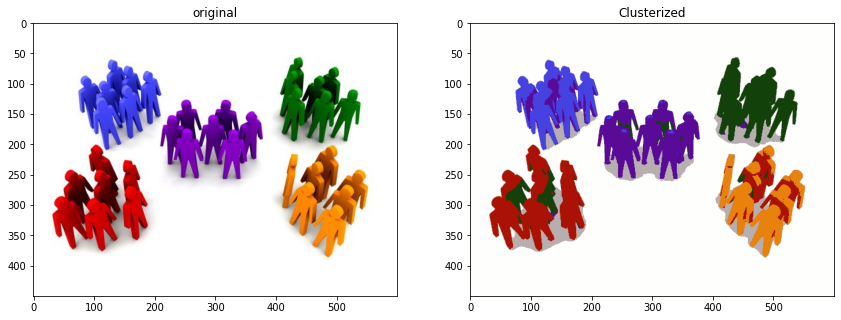

In [ ]:
img = cv2.imread(groups)
ok = doKmeans(img, 7) # because of the shadows, we need at least 7 clusters in order to have 5 different colors for the groups
                      # but, in order to only segment the figures, k=2 is enough

# show the image
imgOk = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(30,30))
plt.subplot(141), plt.imshow(imgOk), plt.title("original")
plt.subplot(142), plt.imshow(ok), plt.title("Clusterized")